# Customer Segmentation Analysis

In [1]:
#Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, confusion_matrix

In [2]:
#Loading of dataset

df1 = pd.read_csv('Customer_Data.csv')

print('Number of rows in the dataframe: %i' % (df1.shape[0]))
print('Number of columns in the dataframe: %i\n' % (df1.shape[1]))
print(list(df1.columns))

Number of rows in the dataframe: 8950
Number of columns in the dataframe: 18

['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


In [3]:
#Displaying the first 5 rows of all columns
df1.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df1.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [5]:
#To get the datatypes of columns
df1.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [6]:
#To know the statiscal data of all parameters
df1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
#Check whether there are missing/null values
df1.isnull().values.any()

True

In [8]:
#Finding the total number of null values in each column 
df1.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
#The above output shows there's 1 missing value in CREDIT_LIMIT and 313 missing values in MINIMUM_PAYMENTS column

In [10]:
#Filling mean value in place of missing values in the dataset
#Imputation Process by taking mean()

df1["MINIMUM_PAYMENTS"] = df1["MINIMUM_PAYMENTS"].fillna(df1["MINIMUM_PAYMENTS"].mean())
df1["CREDIT_LIMIT"] = df1["CREDIT_LIMIT"].fillna(df1["CREDIT_LIMIT"].mean())

In [11]:
#Again verify whether there are missing/null values
df1.isnull().values.any()

False

In [12]:
#The above output shows result as FALSE which means there are no missing values

In [13]:
# Checking for duplicate rows in the dataset
df1.duplicated().sum()

0

In [14]:
# Droping CUST_ID column as its not required
df1.drop(columns=["CUST_ID"],axis=1,inplace=True)

In [15]:
#No of variables after dropping
print('Number of rows in the dataframe: %i' % (df1.shape[0]))
print('Number of columns in the dataframe: %i\n' % (df1.shape[1]))
print(list(df1.columns))

Number of rows in the dataframe: 8950
Number of columns in the dataframe: 17

['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


<AxesSubplot:>

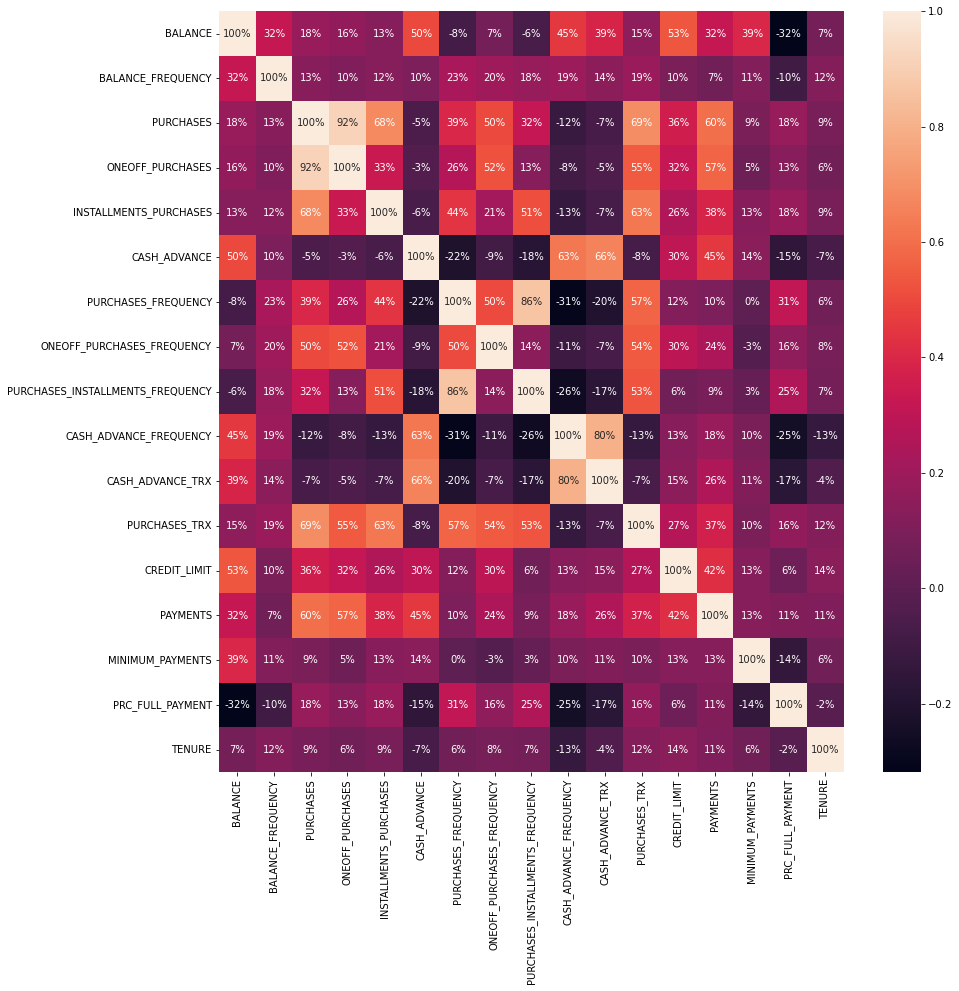

In [16]:
#Visualizing correlation matrix
corr_mat = df1.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr_mat, annot = True, fmt = '.0%')

C:\Users\vanda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vanda\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\vanda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarn

C:\Users\vanda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vanda\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\vanda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarn

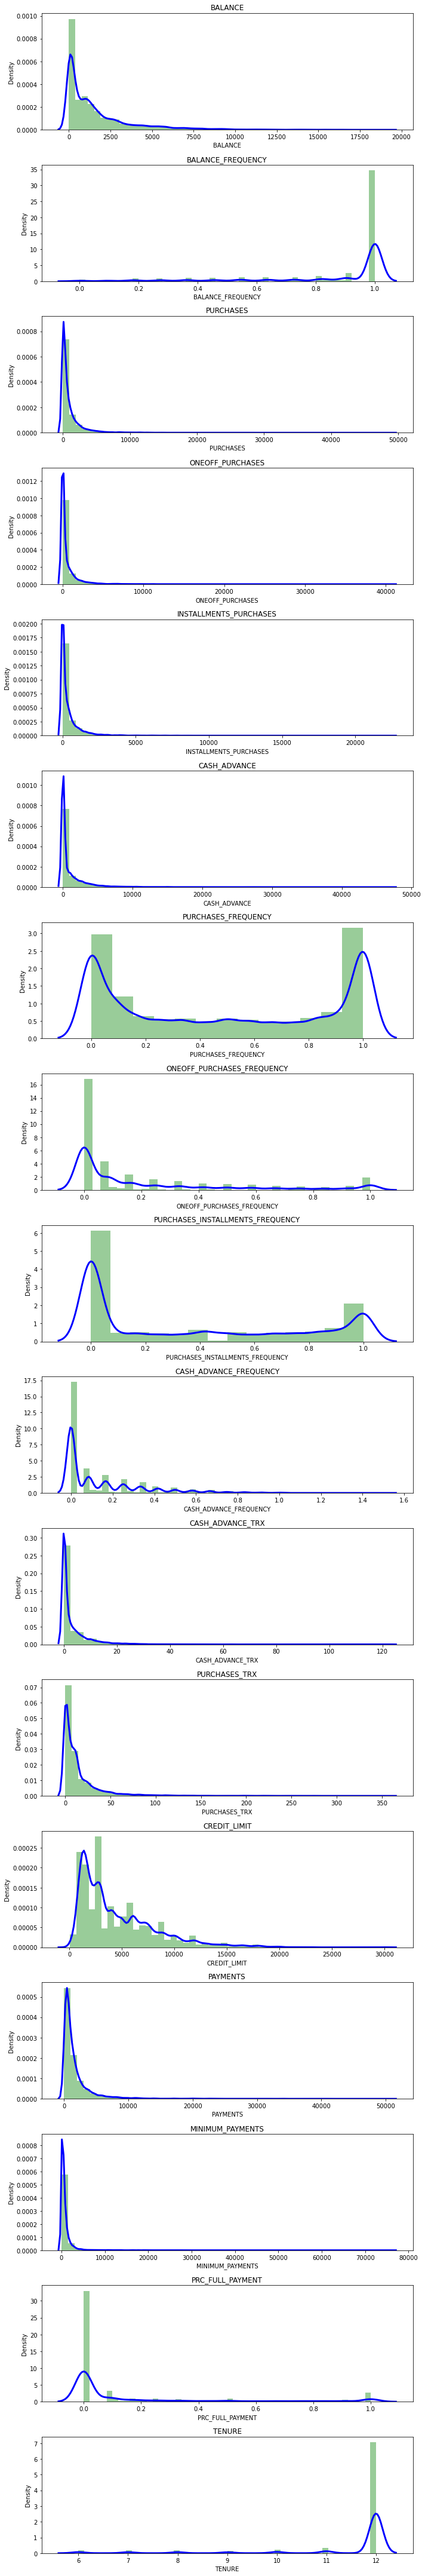

In [17]:
#KDE plot - Kernel Density Estimate

plt.figure(figsize=(10,60))
for i in range(0,17):
    plt.subplot(17,1,i+1)
    sns.distplot(df1[df1.columns[i]],kde_kws={'color':'b','bw': 0.1,'lw':3,'label':'KDE'},hist_kws={'color':'g'})
    plt.title(df1.columns[i])
plt.tight_layout()

C:\Users\vanda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vanda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vanda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

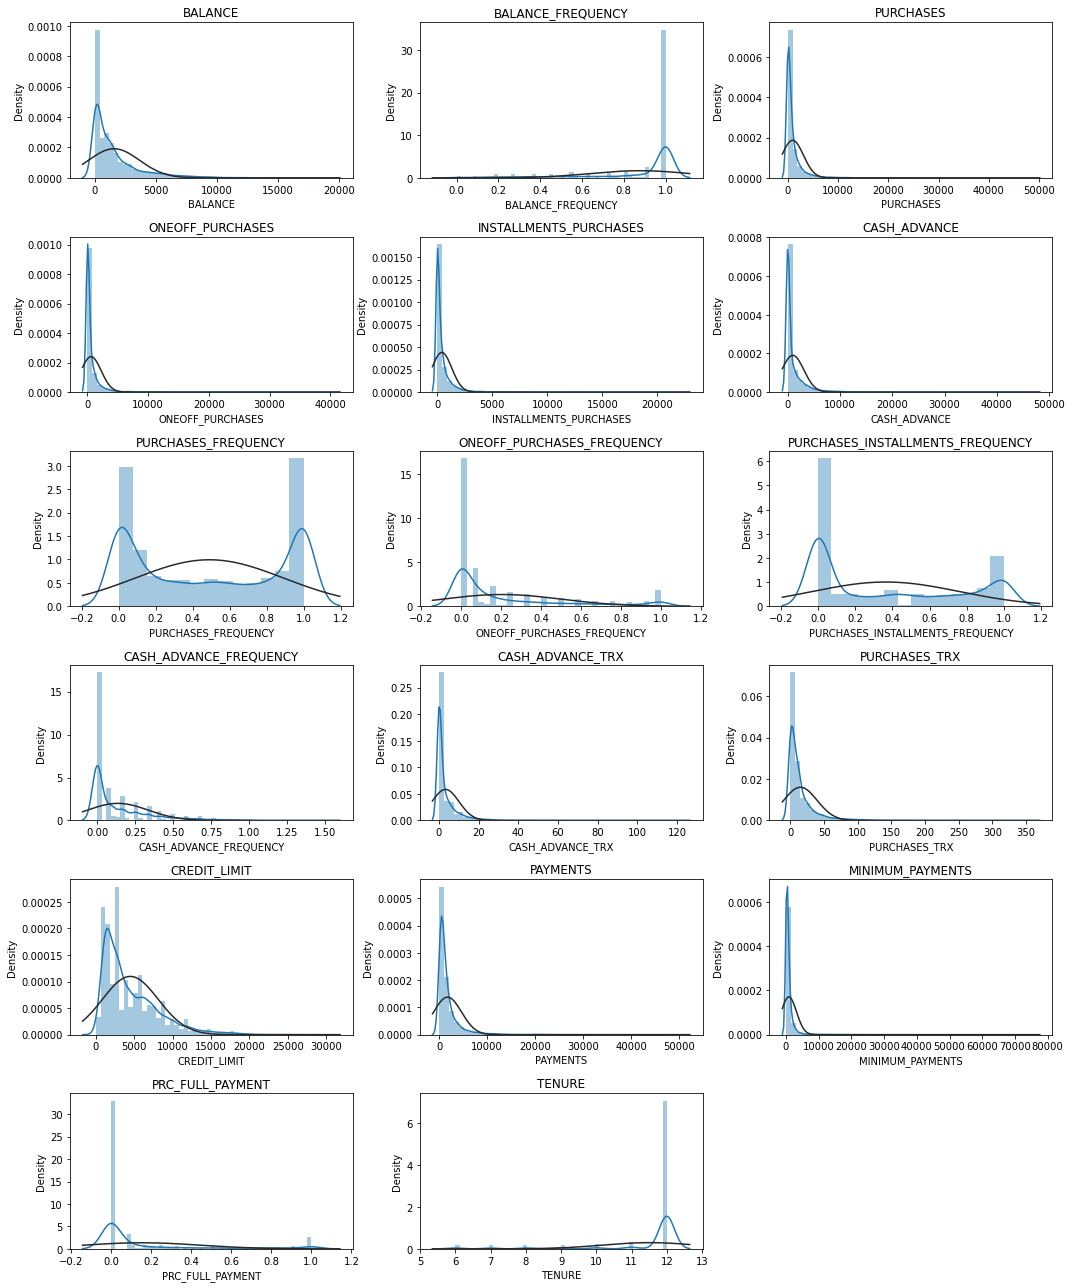

In [18]:
from scipy.stats import norm 

graph_by_variables = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
plt.figure(figsize=(15,18))

for i in range(0,17):
    plt.subplot(6,3,i+1)
    sns.distplot(df1[graph_by_variables[i]].dropna(),fit=norm)
    plt.title(graph_by_variables[i])

plt.tight_layout()

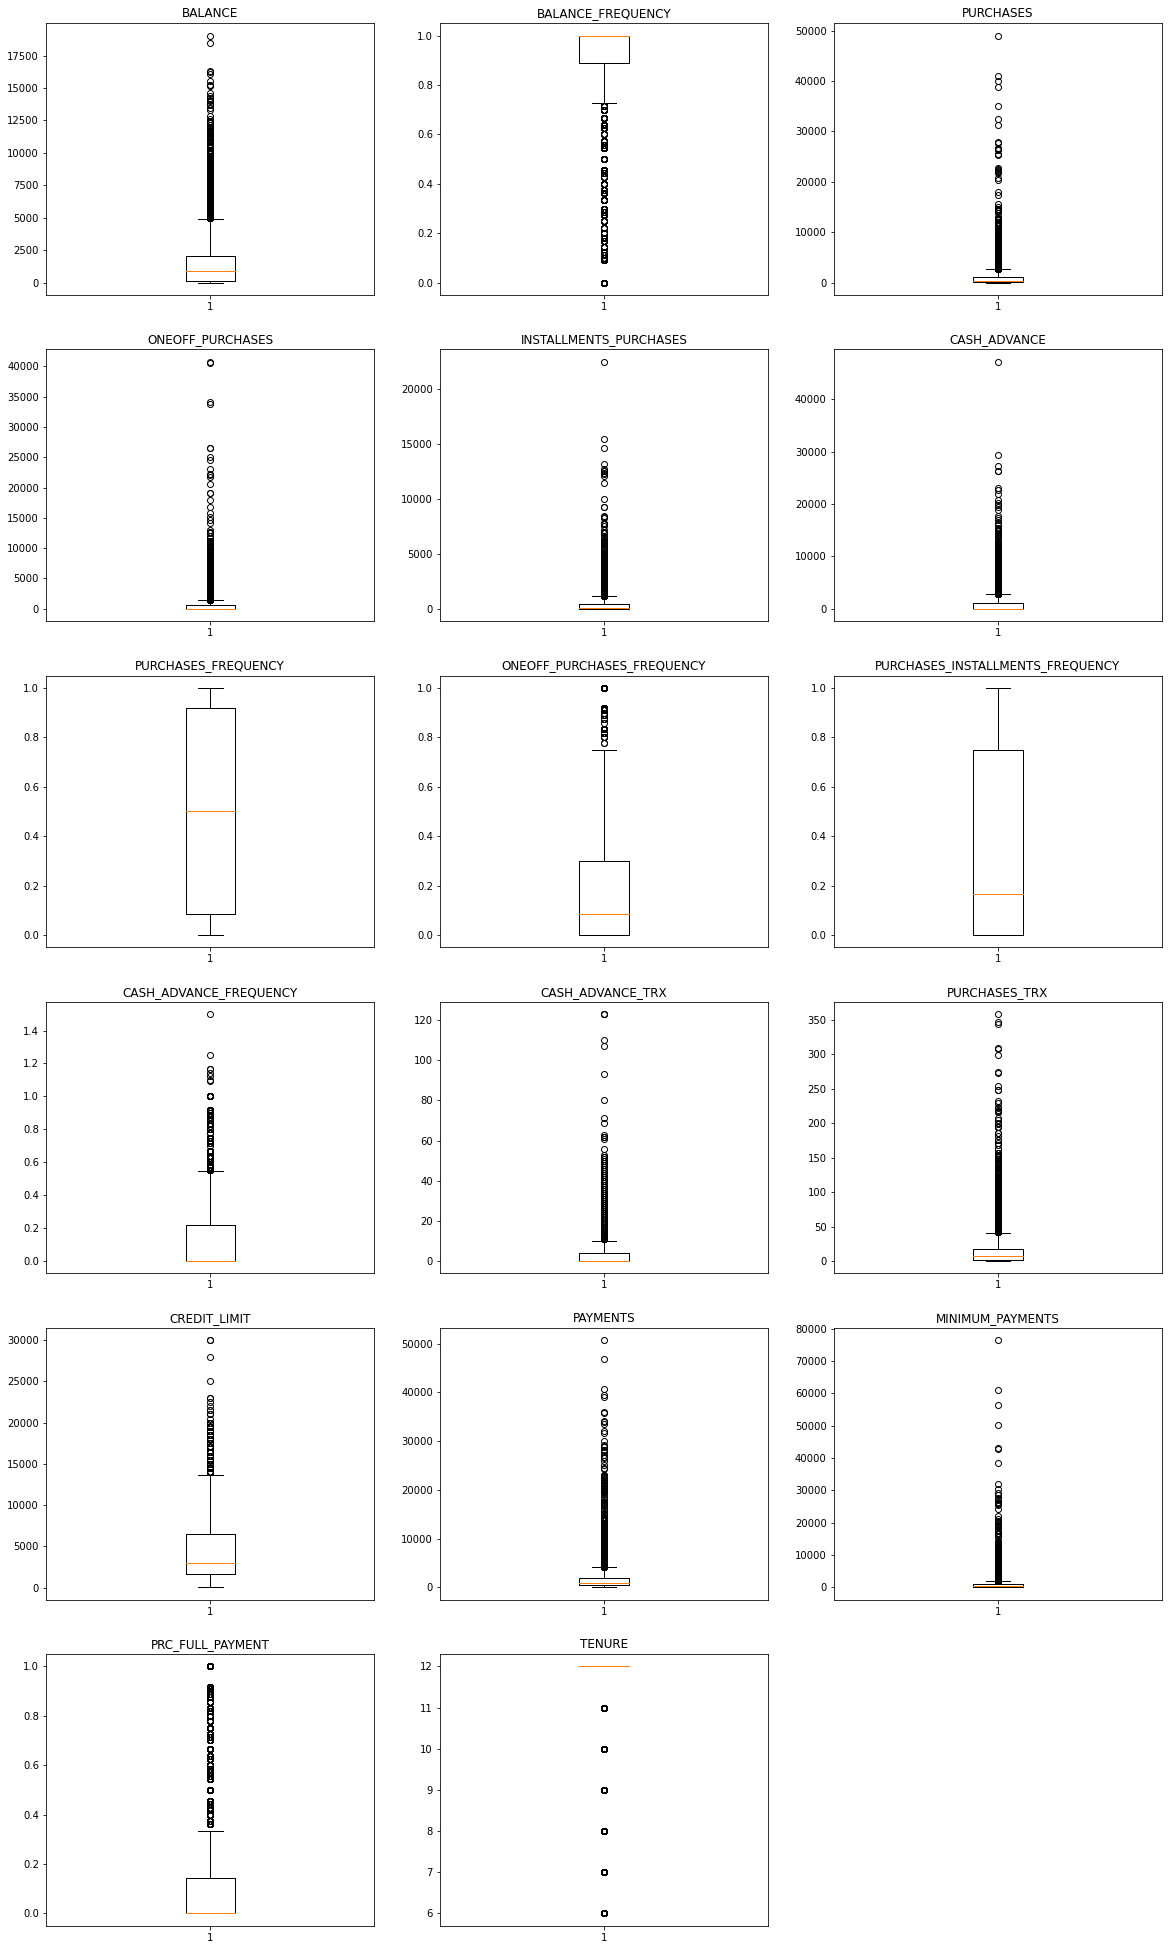

In [19]:
plt.figure(figsize=(20,35))

for i in range(0,17):
    plt.subplot(6, 3, i+1)
    plt.boxplot(df1[graph_by_variables[i]].dropna())
    plt.title(graph_by_variables[i])

In [20]:
#Feature Scaling
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df1)
scaled_df

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [21]:
#Converting dataframe into into 2D DataFrame for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,-1.682221,-1.076443
1,-1.138295,2.506475
2,0.969688,-0.383561
3,-0.873628,0.043163
4,-1.599435,-0.688569
...,...,...
8945,-0.359630,-2.016131
8946,-0.564371,-1.639100
8947,-0.926205,-1.810769
8948,-2.336554,-0.657935


In [22]:
X = df1.iloc[:,[3,13]].values

In [23]:
print(X)

[[   0.        201.802084]
 [   0.       4103.032597]
 [ 773.17      622.066742]
 ...
 [   0.         81.270775]
 [   0.         52.549959]
 [1093.25       63.165404]]


In [24]:
#Finding 'K' value using Elbow Method
#Finding WCSS(within clusters sum of squares) value for different number of clusters
inertia = []
range_val = range(1,11)

for i in range_val:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmeans.inertia_)
    

Text(0, 0.5, 'WCSS')

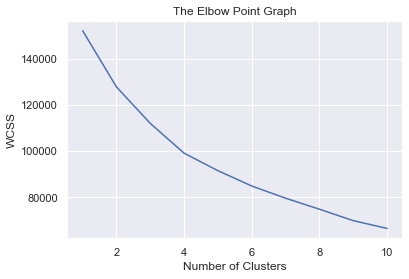

In [25]:
sns.set()

plt.plot(range(1,11),inertia)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

In [26]:
#So by above graph we can consider 4 as number of clusters.

In [27]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([df1,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

In [28]:
#Training the K-Means Clustering Model
kmeans =  KMeans(n_clusters = i, init = 'k-means++', random_state = 0)

#Returns a label for each datapoint based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[0 2 0 ... 0 0 0]


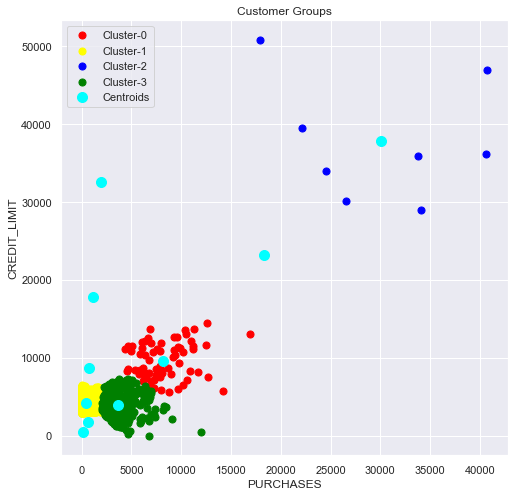

In [29]:
#Plotting all the clusters and their centroids
plt.figure(figsize=(8,8))
#plt.scatter(X[Y == 0,0], X[Y == 0,1], s=50, c='orange', label='Cluster-1')
plt.scatter(X[Y == 1,0], X[Y == 1,1], s=50, c='red', label='Cluster-0')
plt.scatter(X[Y == 2,0], X[Y == 2,1], s=50, c='yellow', label='Cluster-1')
plt.scatter(X[Y == 3,0], X[Y == 3,1], s=50, c='blue', label='Cluster-2')
plt.scatter(X[Y == 4,0], X[Y == 4,1], s=50, c='green', label='Cluster-3')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title("Customer Groups")
plt.xlabel("PURCHASES")
plt.ylabel("CREDIT_LIMIT")
plt.legend()
plt.show()

In [30]:
# #Model Building using KMeans
# kmeans_model=KMeans(4)
# kmeans_model.fit_predict(scaled_df)
# pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

In [31]:
# plt.figure(figsize=(8,8))
# ax = sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data = pca_df_kmeans,palette=['red','green','blue','black'])
# plt.title("Clustering using K-Means Algorithm")
# plt.show()

In [32]:
# find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df1.columns])
# inverse transform the data
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df1.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1011.751528,0.789871,269.973466,209.853863,60.386625,595.759339,0.170146,0.086281,0.080578,0.114833,2.125503,2.903421,3277.703165,974.505090,586.301239,0.078001,11.446429
1,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,650.167072,0.269258,11.594595
2,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100
3,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,7546.957050,3481.145990,2008.251157,0.034859,11.387312


In [33]:
# Creating a target column "Cluster" for storing the cluster segment
cluster_df = pd.concat([df1,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


In [34]:
cluster_df.Cluster.unique()

array([0, 3, 1, 2])

In [35]:
cluster_1_df = cluster_df[cluster_df["Cluster"]==0]
cluster_1_df.shape

(3976, 18)

In [36]:
cluster_2_df = cluster_df[cluster_df["Cluster"]==1]
cluster_2_df.shape

(3367, 18)

In [37]:
cluster_3_df = cluster_df[cluster_df["Cluster"]==2]
cluster_3_df.shape

(409, 18)

In [38]:
cluster_4_df = cluster_df[cluster_df["Cluster"] == 3]
cluster_4_df.shape

(1198, 18)

<AxesSubplot:xlabel='Cluster', ylabel='count'>

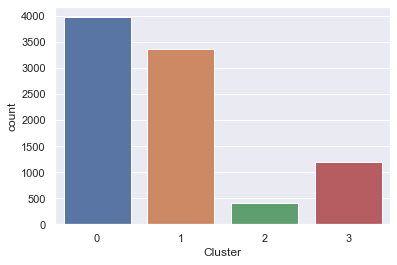

In [39]:
#Visualization
sns.countplot(x='Cluster', data=cluster_df)

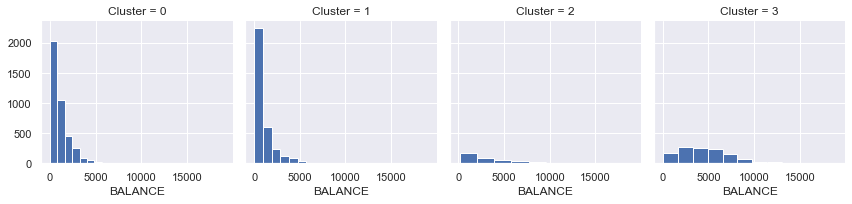

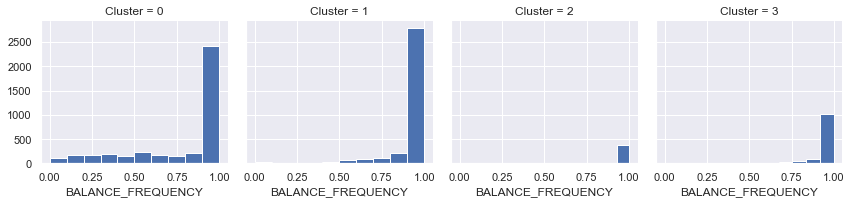

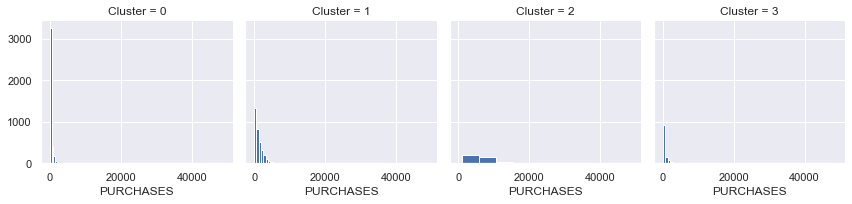

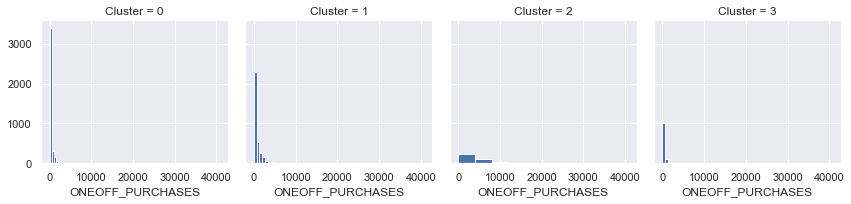

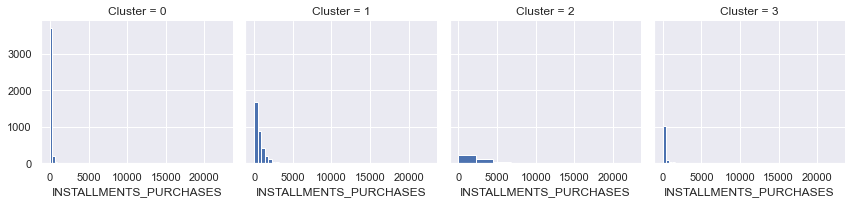

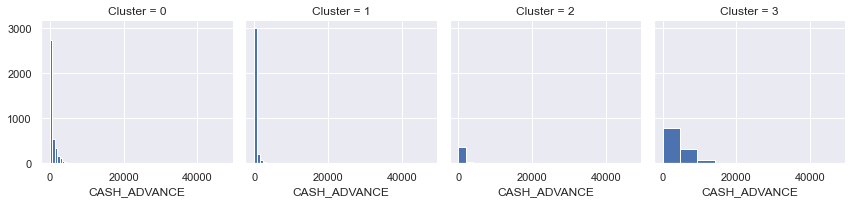

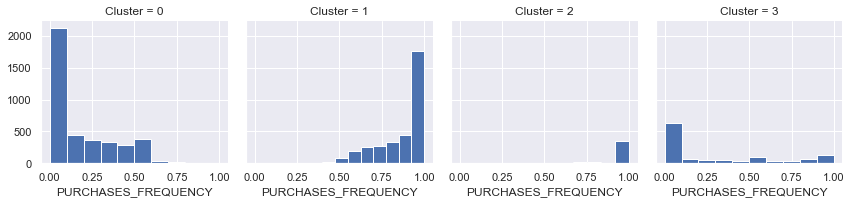

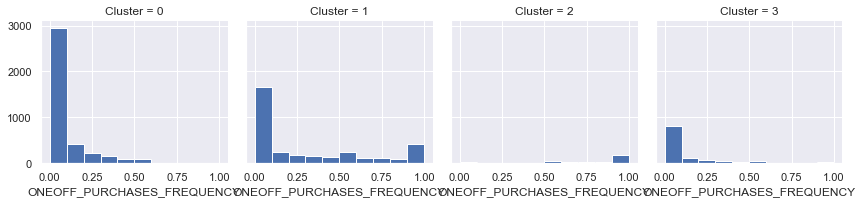

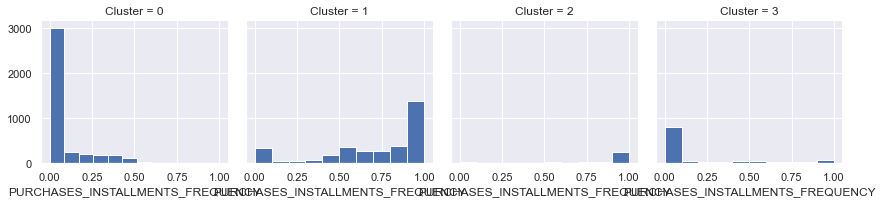

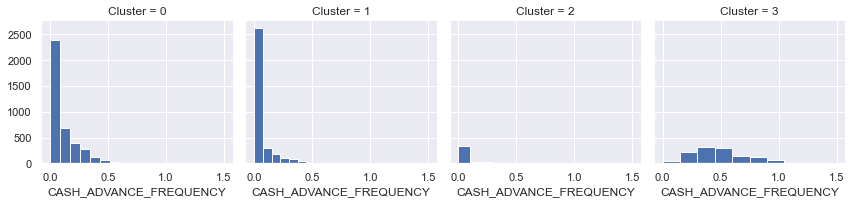

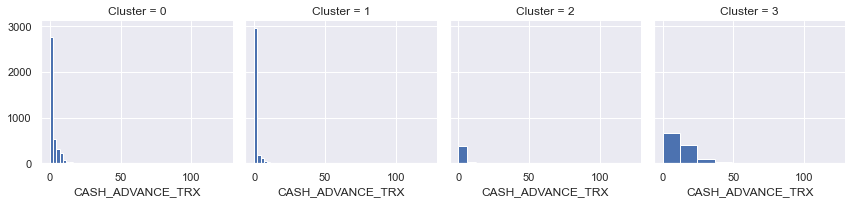

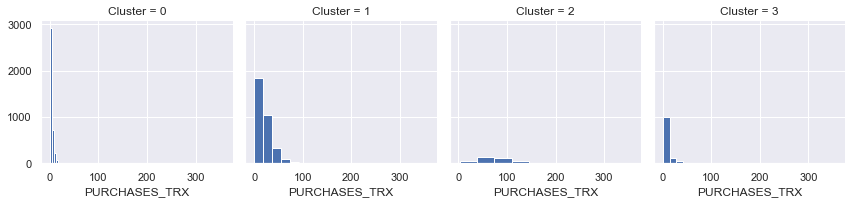

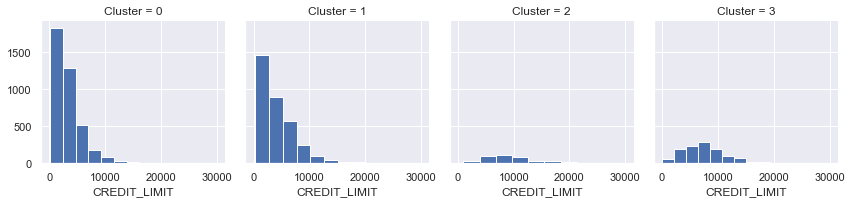

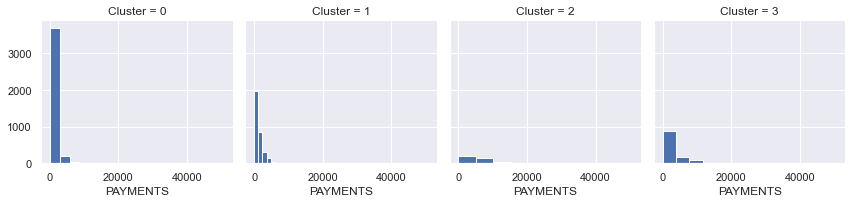

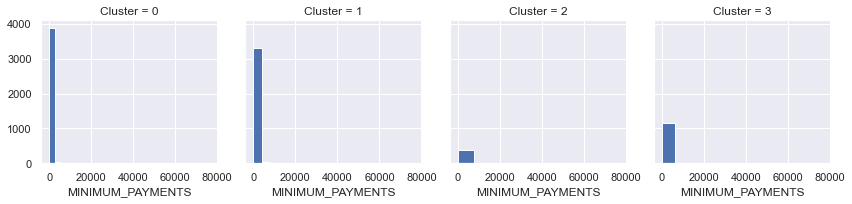

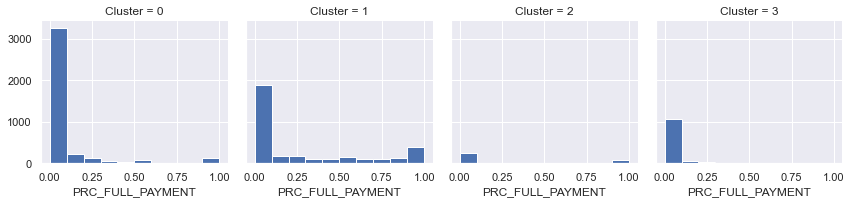

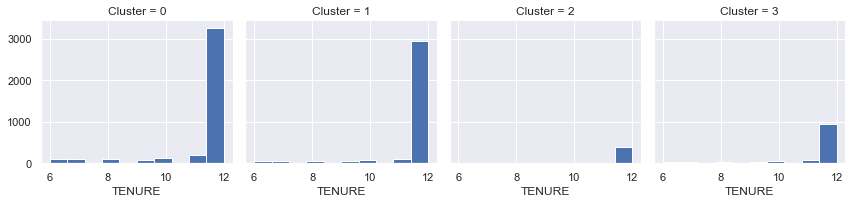

In [46]:
for c in cluster_df.drop(['Cluster'],axis=1):
    grid= sns.FacetGrid(cluster_df, col='Cluster')
    grid= grid.map(plt.hist, c)
plt.show()

In [47]:
#Saving the KMeans clustering model in form of pickle file
import joblib
joblib.dump(kmeans_model, "kmeans_model.pkl")

['kmeans_model.pkl']

In [48]:
#Converting the newly formed dataframe into CSV file
cluster_df.to_csv("Output_Cluster_Data.csv")

# Training and Testing

In [49]:
#Split Dataset
x = cluster_df.drop(['Cluster'],axis=1)
y= cluster_df[['Cluster']]
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2)

In [50]:
x.shape

(8950, 17)

In [51]:
y.shape

(8950, 1)

In [52]:
x_train.shape

(7160, 17)

In [53]:
x_test.shape

(1790, 17)

In [54]:
x_test.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8819,444.183285,0.888889,0.00,0.00,0.00,943.300678,0.000000,0.000000,0.0,0.444444,6,0,2500.0,251.513626,179.715573,0.0,9
4225,226.785380,1.000000,210.64,210.64,0.00,0.000000,0.083333,0.083333,0.0,0.000000,0,1,3500.0,295.155445,176.886468,0.0,12
1070,1050.926790,1.000000,150.00,0.00,150.00,114.462798,0.500000,0.000000,0.5,0.083333,1,6,1000.0,238.619393,5303.958597,0.0,12
6349,1346.777622,1.000000,1798.15,357.80,1440.35,0.000000,1.000000,0.250000,1.0,0.000000,0,40,1500.0,1213.489835,712.170112,0.0,12
7875,666.010085,1.000000,504.87,504.87,0.00,271.354588,0.166667,0.166667,0.0,0.083333,1,2,1000.0,631.927013,173.032903,0.0,12


In [55]:
y_train.shape

(7160, 1)

In [56]:
y_test.shape

(1790, 1)

In [57]:
y_test.head()

,Cluster
8819,0
4225,0
1070,0
6349,1
7875,0


# Decision Tree

In [58]:
#Train the model
dt_model= DecisionTreeClassifier(criterion="entropy")
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [59]:
#Test the model
y_pred1 = dt_model.predict(x_test)

# Decision Tree Model Evaluation

In [60]:
#Printing accuracy, precision, f1-score
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       794
           1       0.95      0.95      0.95       672
           2       0.93      0.92      0.92        85
           3       0.85      0.87      0.86       239

    accuracy                           0.94      1790
   macro avg       0.92      0.92      0.92      1790
weighted avg       0.94      0.94      0.94      1790



In [61]:
#Accuracy Evaluation 
dt_ac = accuracy_score(y_test, y_pred1)
dt_ac

0.9368715083798883

In [62]:
#Mean Absolute Error

dt_mae = mean_absolute_error(y_test, y_pred1)
dt_mae

0.12737430167597766

In [63]:
#Confusion_Matrix
print(confusion_matrix(y_test, y_pred1))

[[752  18   0  24]
 [ 14 638   6  14]
 [  1   6  78   0]
 [ 22   8   0 209]]


<AxesSubplot:>

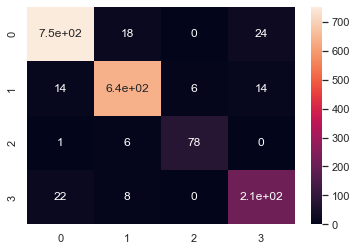

In [64]:
#Visualizing Confusion Matrix
cm = confusion_matrix(y_test, y_pred1)
cm
sns.heatmap(cm, annot=True)

# Random Forest


In [65]:
#Fit,Train the model

rf_model =  RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0 )
rf_model.fit(x_train, y_train)


#Test the model
y_pred2 = rf_model.predict(x_test)
y_pred2


C:\Users\vanda\AppData\Local\Temp/ipykernel_24788/1926915248.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


array([0, 0, 0, ..., 3, 0, 3])

# Random Forest Model Evaluation

In [66]:
#Checking precision, recall, f1-score
print(classification_report(y_test, y_pred2))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       794
           1       0.96      0.96      0.96       672
           2       0.94      0.88      0.91        85
           3       0.94      0.94      0.94       239

    accuracy                           0.96      1790
   macro avg       0.95      0.94      0.94      1790
weighted avg       0.96      0.96      0.96      1790



In [67]:
#Accuracy Evaluation 
rf_ac = accuracy_score(y_test, y_pred2)
rf_ac

0.9581005586592178

In [68]:
#Mean Absolute Error
rf_mae = mean_absolute_error(y_test, y_pred2)
rf_mae

0.06927374301675977

In [69]:
#Confusion_Matrix
print(confusion_matrix(y_test, y_pred2))

[[769  15   0  10]
 [ 16 647   4   5]
 [  0  10  75   0]
 [ 10   4   1 224]]


<AxesSubplot:>

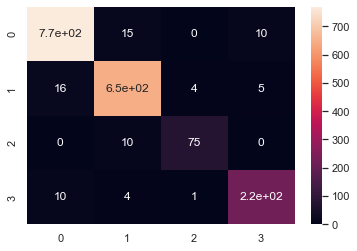

In [70]:
#Visualizing Confusion Matrix
cm = confusion_matrix(y_test, y_pred2)
cm
sns.heatmap(cm, annot=True)

# Comparative Study Graph

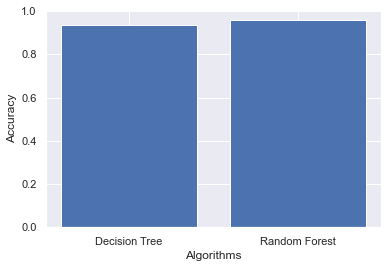

In [71]:
plt.bar(['Decision Tree','Random Forest'],[dt_ac,rf_ac])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

# Saving the Random Forest model in 'sav' format for prediction in frontend

In [72]:
import pickle
filename = 'rf_model.sav'
pickle.dump(rf_model, open(filename, 'wb'))
 
 
#Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result,'% Acuuracy')

0.9581005586592178 % Acuuracy
